# Introduction
This Jupyter Notebook is part of Brian Doheny's submission for the 2021/22 Machine Learning module at Galway-Mayo Institute of Technology. 

In this notebook you will find an introduction to the Scikit-Learn Python library, alongside explanations and examples of three of the machine learning algorithms available in Scikit-Learn, and other useful tools within the library.

You can view a static version of this notebook via the NBViewer button below: 

[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/OtherBrian/machine-learning/blob/main/scikit_learn.ipynb)

You can also view an interactive version via the Binder button:

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/OtherBrian/machine-learning/49d445dafa1b5e5217dee9183dbbc5625e66f4cf)

### Warning - Cell 24 will take a long time to run. If you are running all cells, best get a cup of tea as it may take a few minutes.

# What is Machine Learning?
 
Machine Learning is one of the analysis techniques that frequently comes under the "artificial intelligence" umbrella, whereby a computer program is able to learn the relationships within large datasets, and thus allow us to predict the outcomes for unseen data, or discover new insights on existing data. This is done via the use of various algorithms that utilize advanced statistical methods, many of which have been in development for many years, but until recently haven't been widely viable due to a lack of computer processing power, and the previously high costs of data storage. As computers have become faster, data storage has become cheaper, and the acquisition of data has become more widespread, we're now at the point where these algorithms and models can be applied to real world data to gain new insights that a human would not have been able to unearth. These models can go through millions of observations in minutes or even seconds, something that would take a team of humans years if not lifetimes to replicate[[1]](https://mitsloan.mit.edu/ideas-made-to-matter/machine-learning-explained).
 
It's not only in academia that machine learning has gained in popularity and usefulness. We encounter the outputs of machine learning models everyday as we engage with software and services over the internet and on our devices. Machine learning models allow Amazon to know that I'm likely to be at least vaguely interested in a newly published English translation of a Chinese Sci-fi novel (and it is correct)[[2]](https://www.amazon.science/the-history-of-amazons-recommendation-algorithm). They select the Facebook[[3]](https://blog.hootsuite.com/facebook-algorithm/) or LinkedIn posts[[4]](https://www.postbeyond.com/blog/how-linkedin-algorithm-works/) that I'm most likely to engage with. They even make our photos look a bit better[[5]](https://aidaily.co.uk/articles/how-machine-learning-is-changing-your-smartphone-camera-1).
 
Machine learning is therefore all around us, and every day new applications and algorithms are being developed and tested that in one way or another will alter the way we engage with our world, hopefully for the better.
____
 
# Machine Learning Terminology
 
Before continuing, there are some key phrases and terminology that we must get acquainted with when discussing machine learning. As the machine learning field is at the cross section of computer science, software engineering and statistics, there can be many keywords sharing the same meaning which can of course be confusing. In the pursuit of clarity, throughout this notebook I will be consistent in my use of the following terms and their definitions.
 
## Feature Variables, Target Variables & Labels
 
The whole concept of machine learning is based on using the data available to us to predict something that we do not know and for which these new insights contain high value for us. For this we supply an algorithm with a selection of input variables, known as **"Features"**, in order to predict an output variable, known as the **“Target”**. In scenarios where we are looking to predict what category something should fall into, the target may also be known as the **“Label”**. For example when predicting if a customer will churn or not, the classification of churn or no-churn would be known as the “label”[[6]](https://medium.com/technology-nineleaps/some-key-machine-learning-definitions-b524eb6cb48).
 
A common example often used in machine learning education materials (e.g. Kaggle [[7]](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)) is to use a set of inputs (features) to predict house prices (the target). In this scenario we can use the information we do know (size of the house, how many bedrooms and bathrooms it has, does it have a front and/or rear garden, what neighborhood is it located in) to predict something that we do not know but is important information to us (the house price). As the house price cannot be known until after the house has sold, it is therefore information that is not available to us at the time of prediction. That said, recent events have shown us that such models won't always be perfect[[8]](https://www.bloomberg.com/news/articles/2021-11-08/zillow-z-home-flipping-experiment-doomed-by-tech-algorithms), as a model can only be as accurate as the data fed into it. If there's important features missing in the dataset, then the model cannot identify those relationships.
 
## Supervised Learning & Unsupervised Learning
 
Supervised learning are algorithms that require an initial training dataset whereby the algorithm is fed the target variables as well as the feature variables. This means that the algorithm can explore the relationship between the target and features, develop a model, and then apply that model to new unseen data in future. As target variables are a necessity for supervised learning, we must use historical data for the initial training of the model, and in some cases we must manually “label” the data so that a target variable is present. High quality historical data with relevant features and accurate labels or targets is therefore incredibly important for training a supervised learning algorithm, and acquiring this data can be one of the most costly aspects of applying machine learning. This approach is generally used for regression and classification analysis whereby a prediction can clearly be correct or not as the target variable will at some point be known (e.g. the value of the house is known when the house is sold)[[9]](https://www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning).
 
As the name suggests, unsupervised learning algorithms have one major difference to their supervised peers - we do not have the target or labels available for it to train on. In these scenarios there is no currently known right or wrong answer, and so the unsupervised algorithms are used to unearth new insights that may not already be available to the data scientist. For example, it’s common to use an unsupervised clustering algorithm to form initial customer segments [[10]](https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3) which can then be adapted for use in a supervised classification algorithm in future. Unsupervised algorithms still have the need for high quality and relevant feature data, however the lack of labeled data can make the starting costs lower. However that does come with the drawback that model accuracy may be more ambiguous or that the predictions have less real world usefulness.
 
## Hyperparameters
 
Machine Learning algorithms also have some key hyperparameters that can be tuned so as to provide the most suitable model possible. These hyperparameters come with their own advantages and disadvantages that must be balanced for the task at hand. For example, it is not uncommon for a particular hyperparameter to improve model performance up to a point, after which increasing the hyperparameter further may lead to negative consequences such as overfitting or exponentially increasing the training time of the model. Similarly, different combinations of hyperparameter values will work better together than others, and so we can use tools such as Scikit-Learn's Grid Search Cross Validation[[11]](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) to iterate through numerous specific combinations of hyperparameters and see which works best. I will be utilizing GridSearchCV in my examples later in this notebook.
___
 
# What is Scikit-Learn?
 
Scikit-Learn is one of the most popular and frequently used machine learning libraries available in Python. It boasts a plethora of different algorithms of various types, and works efficiently with other popular Python data science libraries such as Scypy and Numpy[[12]](https://scikit-learn.org/stable/faq.html#why-does-scikit-learn-not-directly-work-with-for-example-pandas-dataframe). The off-the-shelf nature of the algorithms included in Scikit-Learn mean that it meets the needs of most data scientists looking to implement machine learning, and the ease of use of the library itself allows for a gentle introduction to machine learning for new and aspiring data scientists.
 
All of the algorithms included in the library are well vetted, and must follow a similar implementation, thus allowing users to have confidence in the algorithms they are using and be able to move between different algorithms with minimal additional training (other than learning some theory and new parameters).
 
Scikit-Learn also provides a multitude of tools for the preprocessing of data so that it works effectively with a given algorithm[[13]](https://scikit-learn.org/stable/data_transforms.html), selecting the most ideal feature variables for a given dataset, and the means of measuring the algorithm’s performance[[14]](https://scikit-learn.org/stable/model_selection.html). 
 
The categories of algorithm available in scikit learn fall into three main categories:
* Classification
* Regression
* Clustering
 
For this notebook, I will be introducing two classification algorithms, as well as a clustering algorithm. However, my two chosen classification algorithms (Support Vector Machines and Random Forest) can also be used for regression when used with an appropriate dataset, although examples of this are outside of the scope of this notebook.
___
 
# The example dataset
 
Throughout the remainder of this notebook, I will be introducing three popular machine learning algorithms, and in order to do so, I will need a dataset. As I will be introducing classification and clustering algorithms, I will be creating a toy dataset via the make_classification() method in Scikit-Learn[[15]](https://scikit-learn.org/0.16/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification).
 
This allows us to create a random set of data points, but with a number of classes built in. This can then be used for exploring the algorithms within the Scikit-Learn package. 
 
For my examples, I will be creating a dataset consisting of 500 samples spread evenly across two classes. Each sample will consist of 5 features, and 1 label (its class). 

In [1]:
# Importing Pandas to store the data in a dataframe
import pandas as pd

# Importing Numpy for some data manipulation later
import numpy as np

# Importing Matplotlib.pyplot and Seaborn for visualizations.
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing make_classification from sklearn to create the dataset.
from sklearn.datasets import make_classification

# Creating the random data with 500 samples, 5 features & 2 classes 
# Specifying the random_state for consistency.
classification_data = make_classification(n_samples = 500, 
                                          n_features = 5, 
                                          n_classes = 2, 
                                          random_state = 0)

# Converting the Numpy arrays into a DataFrame for easier exploratory analysis.
classification_df = pd.DataFrame(classification_data[0], 
                                 columns=['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5'])

classification_df['class'] = classification_data[1]

# Previewing the first 5 rows
classification_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,class
0,-0.586320,-1.098102,0.302058,2.124734,-0.279467,0
1,-1.097497,-0.681383,0.101036,-1.113952,-1.156319,0
2,0.992137,-0.781938,0.126013,-0.994928,-1.212435,1
3,0.978567,1.512873,-0.303030,0.257567,1.672005,1
4,0.239867,1.605545,-0.369981,-1.089025,1.223898,1


We can also confirm that we have our 5 features, 1 label and 500 observations by checking the dataframe's shape. We expect to see 500 rows and 6 columns.

In [3]:
# Displaying the shape of the dataframe.
classification_df.shape

(500, 6)

## Exploratory Analysis & Feature Selection

Now that the Dataframe is created, I can explore the features via a Seaborn Pairplot[[16]](https://seaborn.pydata.org/generated/seaborn.pairplot.html). This will create a scatterplot for each combination of features, as well as a histogram of each individual feature.

This allows me to see which features may be the best candidates to include in the classification algorithm. Scatterplots that have clear distinctions between the classes will likely do well in a clustering or classification algorithm.

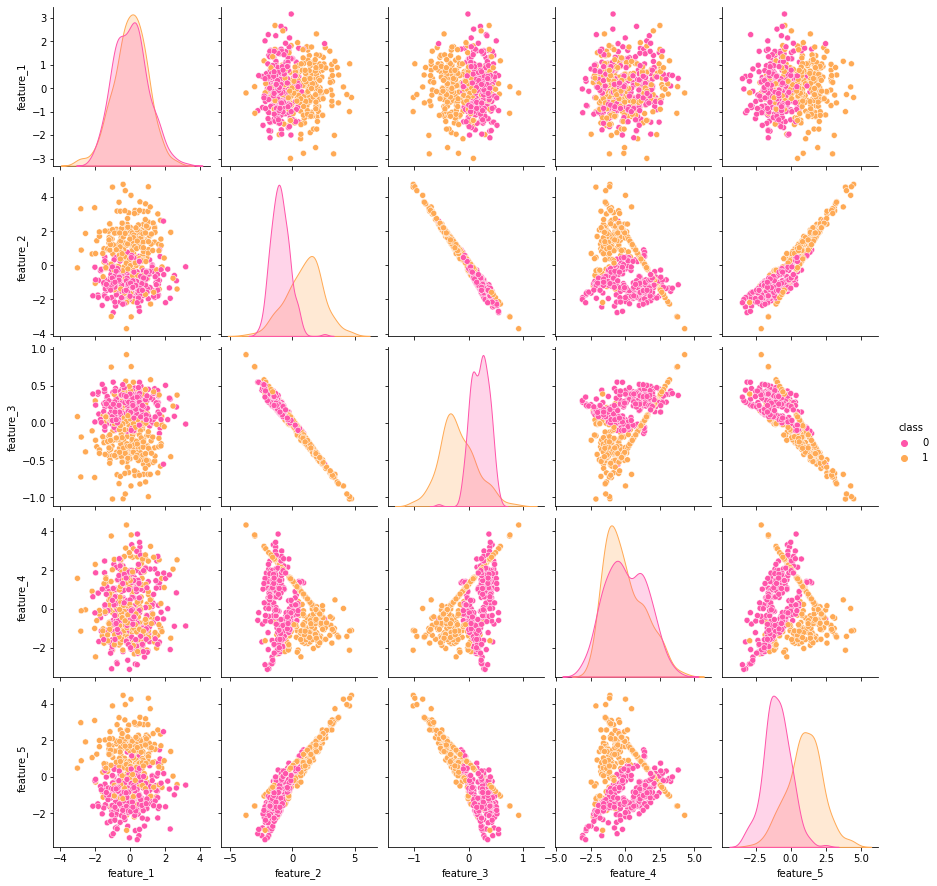

In [4]:
# Creating the Seaborn Pairplot with different colours for each class.
sns.pairplot(classification_df, hue = 'class', palette="spring");

As this is a randomly generated dataset designed to have two classes contained, it's not a surprise to see that we have a number of ideal pairings here. From the histograms we can see that feature_5 has very different distributions for the two classes, and so this will be one of my example features moving forward. 

From the scatter plots, we can see that feature_2 has a good amount of clustering when combined with feature_5, and so for my two dimensional examples, I'll use feature_2 and feature_5. While these two features will be used for the initial classifications, and for my visualizations, all features will be included in the final models.

## Preparing the dataset

I can now prepare my dataset for training and testing the algorithm. The first step is to separate the labels from the features. 

In [5]:
# Specify the column names to be used in the slice.
feature_cols = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5']

# Slice the dataframe
X = classification_df.loc[:, feature_cols]

# Preview the first 5 rows.
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,-0.586320,-1.098102,0.302058,2.124734,-0.279467
1,-1.097497,-0.681383,0.101036,-1.113952,-1.156319
2,0.992137,-0.781938,0.126013,-0.994928,-1.212435
3,0.978567,1.512873,-0.303030,0.257567,1.672005
4,0.239867,1.605545,-0.369981,-1.089025,1.223898


Now I'll do the same with the 'class' label.

In [6]:
# Specify the column for the labels
labels = ['class']

# Create the slice
y = classification_df.loc[:, labels]

# Preview the first 5 rows.
y.head()

,class
0,0
1,0
2,1
3,1
4,1


## Train Test Split

Now that our features and labels are separated, we can split our dataset into a training set and a testing set. This allows us to use a portion of the dataset for training our algorithm, and to withhold a portion specifically for testing the algorithm on unseen data. This allows the user to see how the algorithm performs on unseen data, and whether or not the algorithm is underfitting or overfitting to the training data. Once the user is satisfied with the results against the test set, they can include the entire dataset (i.e. the test and training sets) to train the model before productionising it[[17]](https://www.applause.com/blog/training-data-validation-data-vs-test-data).

As we want our algorithm to train on as much data as possible, the test size usually consists of a much smaller segment of the original dataset. How much exactly depends on how much data is available, for example in situations where observations are scarce the user may opt to have just 10-15% of the dataset withheld for testing so that as much as possible can be used for training. In situations where observations are ample, 25-30% can be withheld for testing so as to gain more rigorous testing results. In this scenario, I will allocate 25% of the observations to be the test set. For this, I will be using train_test_split from Scikit-Learn[[18]](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [7]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets, with 25% withheld for testing. 
# Specifying a random_state for consistency.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 

# Print the number of rows in the training and testing dataframes.
print("Training Samples: " + str(X_train.shape[0]) + "\nTesting Samples: " + str(X_test.shape[0]))

Training Samples: 375
Testing Samples: 125


As I will be using just feature_2 and feature_5 for my 2 dimensional examples, I will now create a slice of X_train and X_test with just these two features. The remaining features will still be used in the final model for each clustering or classification algorithm.

In [8]:
# Specifying the columns for the slice
columns_2d = ['feature_2', 'feature_5']

# Creating the slices
X_train_2d = X_train.loc[:, columns_2d]
X_test_2d =  X_test.loc[:, columns_2d]

# Showing that we now just have 2 features in this dataframe.
X_train_2d.head()

,feature_2,feature_5
239,0.937052,0.305901
59,-0.165452,0.474425
406,-0.260386,-0.338954
391,1.848411,1.384533
411,-1.811866,-1.575380


Our classification and clustering dataset is now ready to be used in our algorithms!
_____

# Algorithm 1) Support Vector Classifier

## What are Support Vector Machines?

Support Vector Machines are a popular supervised machine learning algorithm that can be used for both regression and classification, however it's generally used more for the latter. Its standout feature is the use of hyperplanes as a method of separating the classes within the dataset. These hyperplanes are in an n-1 dimensional space (with n being the number of dimensions in input data, i.e. the number of features), and creates a dividing plane between the classes. These hyperplanes are optimised to have the maximum width between the classes, thus making the algorithm less prone to overfitting training data. The points at the very edges of this hyperplane are known as the "support vectors", and thus give this algorithm it's name[[19]](https://towardsdatascience.com/understanding-support-vector-machine-part-1-lagrange-multipliers-5c24a52ffc5e).

It's also important to note that the data input into the algorithm must be scaled, otherwise the results will be negatively impacted[[20]](https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use). In the examples here I will not be going through the preprocessing steps of scaling the data, as my generated dataset already meets the requirements, however scaling is also possible via Scikit-Learn's preprocessing features[[21]](https://scikit-learn.org/stable/modules/preprocessing.html).


## How do they work? - Classification

Let's take a look at this in action for a simple two dimensional dataset with two distinct classes. However, it should be noted that Support Vector Machines will work on datasets beyond two dimensions, and that I am using two dimensional examples here as it is more straightforward for us to visualize.

<img src="https://github.com/OtherBrian/machine-learning/blob/main/images/classification_illustration1.png?raw=true" alt="example of general linear classifier" style="width: 300px;"/>

Here we can see an example of how one algorithm might separate the two classes. This line looks good, and for this training dataset it's accuracy would be perfect. However, it's just one of an infinite number of lines that could have been used for this training set, and it's impossible to know which is overfit, which underfit and which is just right.

<img src="https://github.com/OtherBrian/machine-learning/blob/main/images/classification_illustration2.png?raw=true" alt="example showing how a line of best fit on a linear classifier may lead to overfitting." style="width: 300px;"/>

In this example, our line of best fit could very quickly show itself to be overfit to our data as we add a couple of new data points.

<img src="https://github.com/OtherBrian/machine-learning/blob/main/images/classification_illustration3.png?raw=true" alt="multiple possible lines of best fit for a general classifier" style="width: 300px;"/>

Now, compare this to the plane of maximum width which the Support Vector Classifier optimizes for. 

<img src="https://github.com/OtherBrian/machine-learning/blob/main/images/svc_illustration1.png?raw=true" alt="example of Support Vector Classifier showing the hyperplane." style="width: 300px;"/>

With the current training dataset, both the line and the hyperplane of maximum width split the classes perfectly, and so it may appear as though the hyperplane is unnecessary. When we add those two additional data points as we did before, we see the real benefit of maximizing the distance between the two classes.

<img src="https://github.com/OtherBrian/machine-learning/blob/main/images/svc_illustration2.png?raw=true" alt="example of Support Vector Classifier showing how new observations are treated by the hyperplane." style="width: 300px;"/>

Whereas picking an arbitrary separator for the two classes resulted in an overfit algorithm, the hyperplane has significantly reduced that risk, and so the two new data points can be classified accurately as they still fall on their respective sides of the hyperplane. If we were to then retrain this algorithm including the new data points, we would end up with a different, newly optimized hyperplane as there would likely be new support vectors.

### Non Linearly Separated Classes

Thus far we've been looking at classes that can be linearly separated by a straight line, but not all datasets are this simple. In situations where classes cannot be separated by a straight line, but are still discernible, the Support Vector Classifier can utilize what is known as the Kernel Trick[[22]](https://vitalflux.com/machine-learning-svm-kernel-trick-example/)[[23]](https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989).

For example, if our features were to look like the example below, no straight line can separate the two classes, and so another solution must be found.

<img src="https://github.com/OtherBrian/machine-learning/blob/main/images/kernel_trick1.png?raw=true" alt="example of non linearly separated classes" style="width: 300px;"/>

In situations like this, the Kernel Trick allows the Support Vector Classifier to add an additional dimension to the features so as to create more space between them. For example, a new variable Z could be made from X^2 + Y^2 or some other calculation, and so we end up with something like this:

<img src="https://github.com/OtherBrian/machine-learning/blob/main/images/kernel_trick2.png?raw=true" alt="example of the Kernel Trick adding an extra dimension to the observations so as to make them linearly separable" style="width: 300px;"/>

Creating the new feature Z from a transformation of the X and Y variables makes the classes easier to separate as shown by the dashed green line representing the new hyperplane. As all of the data points have been transformed via the same formula, the algorithm can transform the hyperplane back into 2 dimensions the same way it will for the rest of the data points.

<img src="https://github.com/OtherBrian/machine-learning/blob/main/images/kernel_trick3.png?raw=true" alt="example of the Kernel Trick showing the effect of the additional dimension when the data is returned to its original dimensions." style="width: 300px;"/>

Thus when everything is returned to two dimensions, we have a circular hyperplane separating the two classes. 

## Using the Support Vector Classifier

### Hyperparameters

The Support Vector Classifier has three main hyperparameters to keep in mind: the kernel, the C hyperparameter, and the Gamma hyperparameter[[24]](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html).

#### Kernel - Default = 'rbf'

This hyperparameter allows the user to change the kernel type used in the algorithm, with certain types working better for various use cases. For example, the 'linear' kernel is very efficient for features that can be linearly separated as it is the simplest kernel. The default kernel, Radial Basis Function (RBF) is also a very popular general use kernel that has a good balance between efficiency and being able to handle various distributions of features. Other kernel options available, such as 'poly' and 'sigmoid' are more suited to other classification tasks such as image recognition and deep learning. 

In my description of the Support Vector Classifier above, I introduced the linear version of the algorithm whereby it splits the data along a straight hyperplane. This linear separation would be the using the 'linear' kernel, whereas the radial basis function ('rbf') kernel uses curves and contours to separate the data, as suggested by the word "radial" in it's name. 

I will use the linear kernel for my initial implementation of a Support Vector Classifier, so as to illustrate how the above examples would look on a real dataset. 

#### C - Default = 1.0

C is the regularisation parameter for this algorithm, and determines how sensitive the algorithm is to misclassified data points. This means it plays a major part in determining if the final model will be overfit or underfit, and so the user must tweak this hyperparameter until they have the balance they need for their use case. The lower the value of C is, the lower the penalty that is applied to incorrectly predicted labels, and so we end up with a more general model that has "soft margins"[[25]](https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167). Soft margins were introduced to Support Vector Machines in 1995 by Cortes and Vapnik[[26]](http://image.diku.dk/imagecanon/material/cortes_vapnik95.pdf) as a method of allow the algorithm to accept some mislabeled data in the pursuit of a more general and usable model. This therefore sacrifices some accuracy, but 100% accuracy would put the model at risk of overfitting, as real world data is unlikely to have a straight dividing line between the classes. Since a lower value for C allows for more errors and a softer margin, it shouldn't be a surprise that a larger value for C will result in a higher penalty for errors and thus thinner margins and higher accuracy.

#### Gamma - Default = 'scale'

Whereas the C value determines the penalty for misclassified data points, the Gamme value determines the range at which the influence of each datapoint reaches[[27]](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html). This therefore impacts the size of the area dedicated to a particular class, with higher values of Gamma resulting in areas that more closely surround the training data points, and lower values being more general. It therefore shares similarities with the C hyperparameter in that higher values for Gamma can lead to overfitting, as the smaller areas mean that new samples are more likely to fall outside of the area for that given class and thus be misclassified. It therefore requires fine tuning alongside the C hyperparameter. 

The default for gamma is set to 'scale' which as the name suggests, scales the value to the size of input data. This is calculated as:

$$1 / (k\times\sigma^2)$$ 

Where $k$ is the number of features, and $\sigma^2$ is the variance of of the features. The user can instead specify a positive floating point value for gamma.

## Support Vector Classifier in action

I will now implement a linear Support Vector Classifier with Gamma and C left as their default values. This'll allow us to introduce the performance measurements for classification, and get a baseline measurement to compare to as we make the model more complex.

In [9]:
# Import the Support Vector Classifier(SVC) from sklearn.svm
from sklearn.svm import SVC

# Instantiating Support Vector Classifier object with default hyperparameters
svc_clf = SVC(kernel='linear')

# Using ravel() to ensure the y values are in the required shape
svc_clf.fit(X_train_2d, y_train.values.ravel())

# Make predictions for the X_test_2d observations.
svc_predictions = svc_clf.predict(X_test_2d)

# Showing the array of label predictions.
print(svc_predictions)

[1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1
 1 0 0 0 0 1 1 0 0 1 0 0 1 0]


Here we can see the predicted labels for each of our observations. Presented like this, it's difficult to see how well the model is performing. Luckily, Scikit-Learn also has a number of model performance metrics available to us.

## Performance Measurements

### Accuracy Score

One of the simplest ways to measure the performance of a classification algorithm is to check its accuracy score[[28]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score). This can be done via the sklearn.metrics.accuracy_score, and will compare the predicted labels to the true labels. The output is a floating point number between 0 and 1.0 reflecting what proportion of the predicted labels match the actual labels. It is therefore crucial that neither array has its sorted order changed, as this will impact the scoring!

In [10]:
from sklearn.metrics import accuracy_score

# Generating an accuracy score for the default Support Vector Classifier.
svc_accuracy = accuracy_score(y_test, svc_predictions)

# Printing the accuracy score to 1 decimal point.
print(f"The default SVC model had a classification accuracy of {(svc_accuracy*100):.1f}%")

The default SVC model had a classification accuracy of 80.8%


Here we can see that the default Support Vector Classifier had an accuracy of 80.8%. Considering I haven't made any optimizations to the hyperparameters, other than using a linear kernel, this is a good start. However, it doesn't tell me much about where the model misclassified, and for that I'll want to use another metric.

### Confusion Matrix

For binary classification tasks, such as my example here, we can use a confusion matrix to not only see how accurate the model's predictions are, but it also allows us to see where the model is going wrong.

This matrix is made by comparing the actual classes to the model's predicted classes, and counting how many predictions are True Positives, True Negatives, False Positives and False Negatives. You can see an example of this below[[29]](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/).

<img src="https://github.com/OtherBrian/machine-learning/blob/main/images/confusion_matrix.png?raw=true" alt="example of a confusion matrix" style="width: 400px;"/>

As my classification dataset has just two labels, 0 and 1, I can use a confusion matrix to assess the performance of the model via Scikit-Learn[[30]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). In this case observations with the label "1" would be treated as the positive labels, and "0" would be the negative labels.

In [11]:
from sklearn.metrics import confusion_matrix

# Creating a confusion matrix for the default Support Vector Classifier.
svc_matrix = confusion_matrix(y_test, svc_predictions)

print(svc_matrix)

[[57  7]
 [17 44]]


Here we can see that the model had 57 True Positives, 7 False Positives, 17 False Negatives and 44 True Negatives. We therefore have 24 labels that were incorrectly classified, with positives (label "1") being incorrectly classified more often than negative labels ("0").

If we take a look at the scatterplot of feature_2 vs feature_5 again, we can see that there are some observations with label 1 that are well dispersed from the main cluster of 1's, and go deep into the cluster of 0's. This is likely the cause of the false negatives in this case, and so may be remedied by adding additional features into the model.

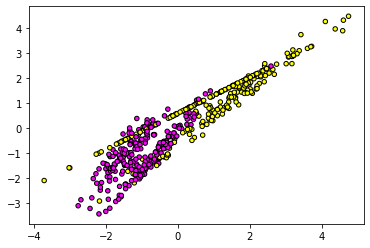

In [12]:
# Plotting the two features, and coloring based on their class.
plt.scatter(classification_df['feature_2'], 
            classification_df['feature_5'], 
            c=classification_df['class'], 
            cmap=plt.cm.spring, 
            s=20, 
            edgecolors='k');

We can also see the decision boundaries more clearly by plotting a meshgrid with contours. This requires some transformation of the data, and so I have borrowed the technique from Newbedev's online tutorial[[31]](https://newbedev.com/plot-scikit-learn-sklearn-svm-decision-boundary-surface). This will show us how points would be classified in each area of the scatterplot, and we can layer the original scatter plot on top so as to compare the actual label to the predicted label.

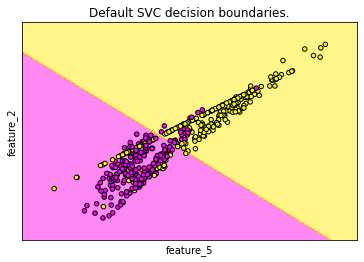

In [13]:
# Selecting the 2 features from the original dataframe, and formatting them correctly.
X_2d = classification_df.iloc[:, [1,4]].to_numpy()  
# Selecting the labels via iloc so that they are in the correct format.
y_plotting = classification_df.iloc[:, 5]


# Creating a function for generating meshgrids via Numpy.
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Creating a function for using the meshgrid values to create contours.
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Creating the SVC Classifier and fitting it using all of the data (i.e. test and train combined)
svc_clf = SVC(kernel='linear')
svc_clf = svc_clf.fit(X_2d, y_plotting)

fig, ax = plt.subplots()

# Creating the grid for plotting.
X0, X1 = X_2d[:, 0], X_2d[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Plotting the contours via the plot_contours() method above.
plot_contours(ax, svc_clf, xx, yy, cmap=plt.cm.spring, alpha=0.5)

# Plotting a scatter plot of the two variables on top.
ax.scatter(X0, X1, c=y_plotting, cmap=plt.cm.spring, s=20, edgecolors='k')
ax.set_ylabel('feature_2')
ax.set_xlabel('feature_5')

# Clearing the ticks.
ax.set_xticks(())
ax.set_yticks(())

# title for the plot
ax.set_title("Default SVC decision boundaries.");

With this we can see why we have some False Positives and False Negatives, as we've got pink dots (actual negatives) in the yellow region (positive predictions), and vice versa. It may be that including additional features will help separate these two classes further, although that would be much more difficult to visualize, especially as we're using 5-dimensional data here.

## Grid Search Cross Validation & Hyperparameter Tuning

Before including more features for our model, I'm going to use Grid Search Cross Validation to show how the hyperparameters affect the model results. This allows me to specify a few values for each hyperparameter that I would like to test out, and GridSearchCV will iterate through each and find the most performant combination.

I will be optimizing the values for C and Gamma, as well as the type of kernel the model uses.

In [14]:
from sklearn.model_selection import GridSearchCV

# Defining the parameters I want to iterate through
svc_parameters = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear','rbf']}  

# Instantiating the grid with the above parameters and an SVC model.

svc_grid = GridSearchCV(SVC(), svc_parameters) 
   
# Fitting the model for the grid search
svc_grid.fit(X_train_2d,  y_train.values.ravel()) 
 
# Print the best parameters based on the fit above.
print("The combination of parameters with the best results is: ")
print(svc_grid.best_params_) 

# Generate predictions from those best parameters
svc_grid_predictions = svc_grid.predict(X_test_2d) 
   
# print the accuracy score and confusion matrix
print(f"\nThe model with the above parameters had a classification accuracy of {(accuracy_score(y_test, svc_grid_predictions)*100)}%")
print(f"\nThe default model's classification accuracy was {(svc_accuracy*100):.1f}%")

print("\nThe Confusion Matrix for this model is:\n",confusion_matrix(y_test, svc_grid_predictions))

print("\nThe default model's Confusion Matrix was:\n", svc_matrix)

The combination of parameters with the best results is: 
{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

The model with the above parameters had a classification accuracy of 88.0%

The default model's classification accuracy was 80.8%

The Confusion Matrix for this model is:
 [[57  7]
 [ 8 53]]

The default model's Confusion Matrix was:
 [[57  7]
 [17 44]]


Here we can see that the accuracy has improved by 7.2%. This is a dramatic improvement, especially for a model using 2 features. We can also see from the confusion matrix that there are less false negatives and the same number of false positives.
 
Helpfully, GridSearchCV tells us which combination of hyperparameters had the best results. From this we can see that all three hyperparameters were changed from their original values. Let's examine how these will have impacted the model.
 
As mentioned previously, I used the linear kernel for the first version of the model so as to show what a linear hyperplane looks like on a real dataset. However, for this particular dataset, GridSearchCV found that a radial basis function ("rbf") kernel was more accurate. This makes sense as the scatterplots above show that there are some class 1 data points going deep into the class 0 cluster, and so a straight line will not effectively split these two classes. A more curved shape would be required, and this is where the radial basis function kernel outperforms the linear kernel as it can create circles and contours as its hyperplane.
 
C defaults to 1.0 for Support Vector Classifiers, however the Grid Search Cross Validation found that 100 provided better results. 
 
Meanwhile the Gamma changed from "scale" to "auto". The difference between these two values is that while "scale" is calculated as :
$$1 / (k\times\sigma^2)$$ 

Where $k$ is the number of features, and $\sigma^2$ is the variance of of the features. Meanwhile "auto" is just: 
$$1 / k$$ 
and so "auto" will result in a larger value for gamma as 1 is being divided by a smaller value.
 
We can now plot the decision boundaries for these values and see how it differs from before.

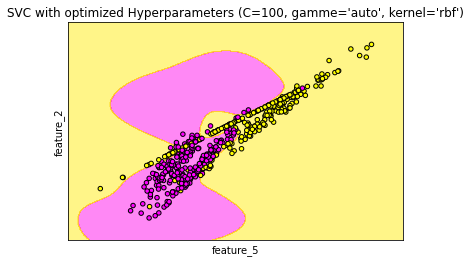

In [15]:
# Creating the SVC Classifier with the optimized hyperparameters
svc_clf = SVC(C = 100, gamma = 'auto', kernel = 'rbf')
svc_clf = svc_clf.fit(X_2d, y_plotting)

fig, ax = plt.subplots()

# Creating the grid for plotting.
X0, X1 = X_2d[:, 0], X_2d[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Plotting the contours via the plot_contours() method above.
plot_contours(ax, svc_clf, xx, yy, cmap=plt.cm.spring, alpha=0.5)

# Plotting a scatter plot of the two variables on top.
ax.scatter(X0, X1, c=y_plotting, cmap=plt.cm.spring, s=20, edgecolors='k')
ax.set_ylabel('feature_2')
ax.set_xlabel('feature_5')

# Clearing the ticks.
ax.set_xticks(())
ax.set_yticks(())

# title for the plot
ax.set_title("SVC with optimized Hyperparameters (C=100, gamme='auto', kernel='rbf')")

plt.show();

Immediately we can see the effect of the radial basis function kernel, as the hyperplane is no longer a straight line decision boundary, but a much more fluid and curved shape. 

Meanwhile, as mentioned in the hyperparameters section, a higher value for C will result in a larger error for misclassified points, and thus result in a less generalized model. A less generalized model will typically have tighter decision boundaries as it tries to ensure it captures as many of each class as possible. In this case we can see that the decision boundary is very tight to some of the data points, especially in the middle to middle-left section of the graph. While this mayprovide better results for this dataset, it could potentially lead to overfitting when new unseen data is introduced to the model.

## Building a model with more features

Before we leave the Support Vector Classifier, let's see how the model's results are impacted by including all five features. The inclusion of these additional features may also impact which hyperparameters generate the best results, and so I will again use GridSearchCV to find the best model to suit these features. I will use the same combinations of hyperparameters as before.

In [16]:
# Instantiating the grid with the previous parameters and an SVC model.
svc_grid = GridSearchCV(SVC(), svc_parameters) 
   
# Fitting the model for the grid search using the full X_train dataset.
svc_grid.fit(X_train,  y_train.values.ravel()) 
 
# Print the best parameters based on the fit above.
print("The combination of parameters with the best results is: ")
print(svc_grid.best_params_) 

# Generate predictions from those best parameters using the full X_test dataset
svc_grid_predictions = svc_grid.predict(X_test) 
   
# print the accuracy score and confusion matrix
print(f"\nThe model with the above parameters had a classification accuracy of {(accuracy_score(y_test, svc_grid_predictions)*100)}%")

print("\nThe Confusion Matrix for this model is:\n",confusion_matrix(y_test, svc_grid_predictions))



The combination of parameters with the best results is: 
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

The model with the above parameters had a classification accuracy of 91.2%

The Confusion Matrix for this model is:
 [[60  4]
 [ 7 54]]


With all five features included, the model's accuracy increased to 91.2%. This is still a good improvement on the optimized 2 feature model, however it does highlight just how effective our two feature model was. In a real world scenario, we'd have to assess whether the benefit of an additional 3.2% accuracy would outweigh any associated costs of the additional model complexity so as to decide which model is truly best for our use case. In some scenarios, adding the 3 additional features may just be too costly, either in time or resources, for the 3.2% gain.

This concludes our introduction to Support Vector Classifiers. On to the next algorithm!
____

# Algorithm 2) Random Forest Classifier

The Random Forest algorithm is a very popular algorithm for both classification and regression due to the fact it can produce a fairly strong model with limited hyperparameter tuning or data preprocessing. Unlike the Support Vector Classifier introduced above, Random Forests do not need the input data to be scaled, and is thus seen as a good "off the shelf" algorithm[[32]](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees).

Random Forests are an ensemble algorithm, as their predictions are a result of the predictions of multiple individual models. In this case the random forest is made up of many individual decision trees, each of which will make their own prediction, and the final prediction is then based off of those individual predictions. In the case of classification, the forest goes with the majority vote, whereas for regression the final prediction is an average of the composite predictions. This shares similarities with the wisdom of crowds observed in humans whereby the aggregate prediction of many generally outperforms the prediction of one person, regardless of their individual expertise[[33]](https://en.wikipedia.org/wiki/The_Wisdom_of_Crowds). Inaccuracies on an individual level get ironed out by the masses, and this also reduces the risk of the random forest overfitting the training data.

Before diving into the specifics of the Random Forest algorithm, we must first look at Decision Trees, as these are the fundamental building blocks of this ensemble.

## Introduction to Decision Trees

Decision Trees are one of the simplest machine learning algorithms for us to understand because we see such decision trees frequently in life. For example, people working in customer support may use decision trees when troubleshooting a particular issue so as to narrow down the cause or best next steps.

In machine learning, these decision trees will continually split the data until there are no more valuable splits to make, and thus a prediction can be made for a particular observation. The default hyperparameters for the scikit-learn decision tree uses the gini impurity index to decide the best split at each "node". The Gini Impurity Index measures how impure each group of observations are, with lower scores meaning there's less mixing of the classes. A score of 0 would mean that the classes are perfectly split with no misclassifications, which is of course the ideal scenario. Therefore at each node the algorithm is looking for the cleanest split of the classes so as to get the best prediction in as few nodes as possible[[34]](https://victorzhou.com/blog/gini-impurity/). When there's no more splits possible, the observations will remain in their final leaves, with each leaf determining the prediction. 

<img src="https://github.com/OtherBrian/machine-learning/blob/main/images/deicision_tree_example.png?raw=true" alt="example of a decision tree" style="width: 600px;"/>

Each tree is trained on the observations and comes up with its own classifications for each observation, and in a Decision Tree model that'd be that. However in a Random Forest Classifier, each of the trees makes a vote for the classification of that observation, and the majority vote wins. In the case of the Random Forest Regressor, the forest takes an average of the predicted values from each of the trees instead.

<img src="https://github.com/OtherBrian/machine-learning/blob/main/images/random_forest_example.png?raw=true" alt="example of a random forest" style="width: 600px;"/>

So as to ensure that each tree doesn't look exactly the same, the forest has some random elements introduced, hence the name Random Forest. For example at each node split, the trees in the random forest can only access a random subset of the total features, and the individual tree will then pick the available feature that has the most information gain. As features available to that particular tree at that particular node split are randomly selected, it means that it is very unlikely for two trees to have the exact same choice of features throughout, although more trees will increase the likelihood of this happening. However, a single Decision Tree model will have access to all of the features of each split, as this randomized element is no longer required as it just depends on the one conclusion, rather than the average of a multitude as is used in the Random Forest model.

### Decision Tree Implementation

We can implement a Decision Tree Classifier via Scikit-Learn as shown below[[35]](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):

In [17]:
# Importing the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Instantiating a decision tree.
tree_clf = DecisionTreeClassifier(random_state = 0)

# Fitting the 2 dimensional training data
tree_clf.fit(X_train_2d, y_train)

# Making predictions on the 2 dimensional testing data.
tree_predictions = tree_clf.predict(X_test_2d)

# Calculating and printing the accuracy.
tree_accuracy = accuracy_score(y_test, tree_predictions)

print(f"The default Decision Tree model had a classification accuracy of {(tree_accuracy*100):.1f}%")
print("\nThe Confusion Matrix for this model is:\n", confusion_matrix(y_test, tree_predictions))


The default Decision Tree model had a classification accuracy of 84.8%

The Confusion Matrix for this model is:
 [[54 10]
 [ 9 52]]


As with the Support Vector Classifier, we can also plot the decision boundaries. This will give us some insight as to why some points are being misclassified.

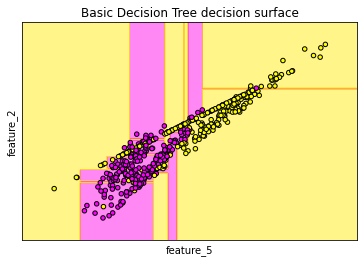

In [18]:
fig, ax = plt.subplots()

# Creating the grid for plotting.
X0, X1 = X_2d[:, 0], X_2d[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Plotting the contours via the plot_contours() method above.
plot_contours(ax, tree_clf, xx, yy, cmap=plt.cm.spring, alpha=0.5)

# Plotting a scatter plot of the two variables on top.
ax.scatter(X0, X1, c=y_plotting, cmap=plt.cm.spring, s=20, edgecolors='k')
ax.set_ylabel('feature_2')
ax.set_xlabel('feature_5')

# Clearing the ticks.
ax.set_xticks(())
ax.set_yticks(())

# title for the plot
ax.set_title("Basic Decision Tree decision surface")

plt.show();

The Decision Tree model is able to split up the observations in much more precise slices than the Support Vector Classifier, however with the default hyperparameters it still struggles to separate those yellow points which are surrounded by pink points. For example in the bottom left we can see clusters of mostly pink points, with just a few individual yellow points dotted around which the model is unable to separate. This is likely due to the default hyperparameters requiring that a node has a certain amount of observations before it performs a split, and thus we're left with somewhat impure leaves.

Another great advantage of Decision Tree models is that we can visualize the actual tree itself and see how each split was made[[36]](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).

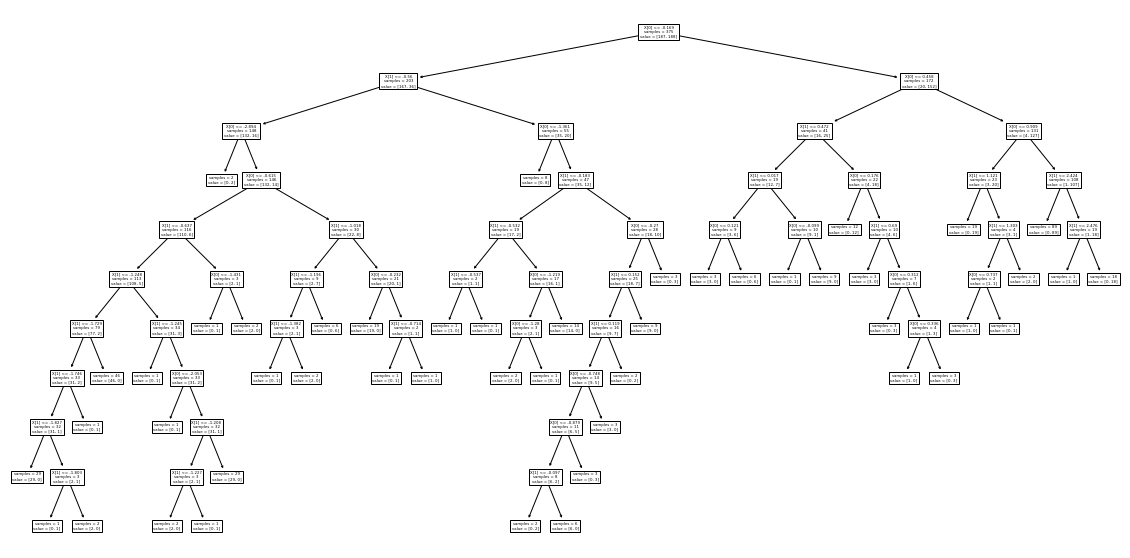

In [19]:
# Plotting the full decision tree for the tree_clf model. Hiding the impurity (gini) measure.
from sklearn import tree

# Creating a figure and axis to plot the decision tree onto
fig, ax = plt.subplots(figsize=(20,10))

# Plotting the decision tree onto the axis.
tree.plot_tree(tree_clf, ax = ax, impurity = False);

Here we can see that an individual observation can go through a maximum of 10 decisions before it falls into a leaf and a prediction is thus made. We would therefore say that this decision tree has a depth of 10. This isn't the same for all routes, taking the left route on each of the nodes leads to leaf after just 3 decisions. Generally deeper decision trees are more prone to overfitting data as more decisions are likely to mean less generalisation for those decisions.

This particular decision tree plot is difficult for us to read, and so we can just plot the first few levels so that we can see the criteria clearly (below). In this case, X[0] refers to the value of feature_2, whereas X[1] refers to the value for feature_5. Each decision node tells us how many samples (observations) are present at that node, and the makeup of the final predictions from those samples. 

For example, at the very first decision node (at the top) we see 375 samples, of which 187 were finally classified as one value, and 188 the other. At this node, any observation that had a feature_2 (X[0]) value of less than or equal to -0.169 would take the left path, and any with greater than -0.169 would take the right path. Those observations would then go onto the next decision node where their path is determined by that node's criteria, and continue on until they cannot be split further, and are thus grouped into a leaf.

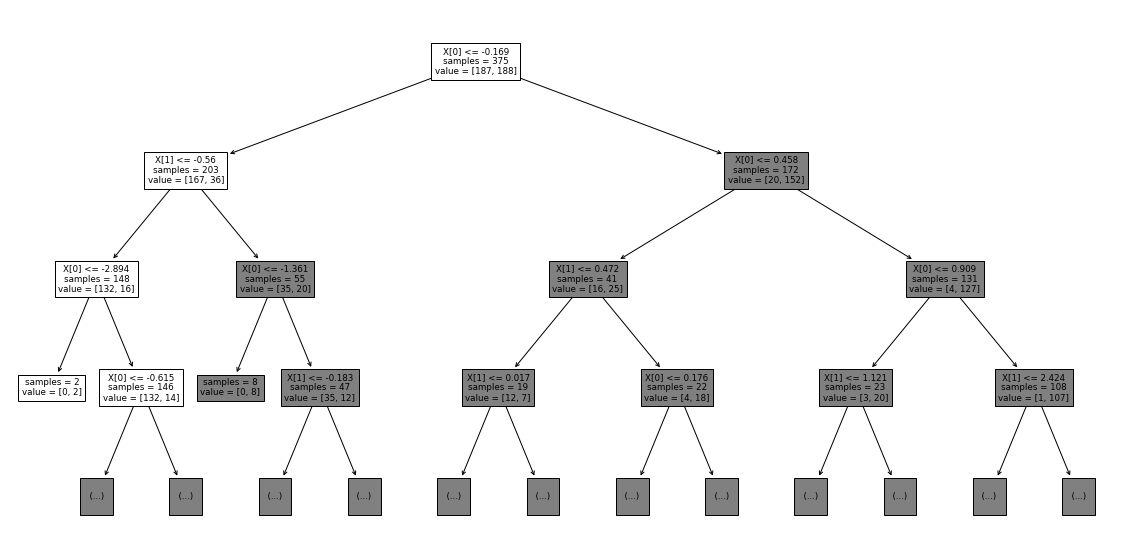

In [20]:
fig, ax = plt.subplots(figsize=(20,10))

# Just plotting the first 3 nodes for easier reading.
tree.plot_tree(tree_clf, max_depth = 3, ax = ax, impurity = False);

## From Decision Tree to Random Forest

We've already seen that a lone Decision Tree can make a decent prediction on our observations, however the random forest has a few safeguards that make the model less prone to overfitting. The key to these is the random elements introduced, as suggested by the name Random Forest, as this ensures that we don't end up with multiple identical decision trees making our predictions.

Whereas a decision tree will train on all of the available training data and create its model, the trees in the random forest will randomly select a subset of the training observations with replacement, and use those to create its individual model. This makes it very unlikely that two trees are being trained on the exact same observations. This method is known as a bagging meta-estimator[[37]](https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator).

Another key randomization element occurs at each of the decision nodes on the individual trees. At each node, the tree takes a random subset of the features and selects the one with the best Gini Impurity Index. For example, if there were 10 features, it might take a random subset of 3 features, then select the one that provides the best results to be split on. At the next node, this process is repeated, with another 3 features used from the total 10[[38]](https://builtin.com/data-science/random-forest-algorithm).

These randomized elements generally lead to shallower trees than what would be created via a decision tree model, and thus a more general model overall. Likewise as the final classification is based on a majority vote, the risk of overfitting is further reduced, as a tree that is individually overfit doesn't have an outweighed influence on the final prediction.

## Random Forest Implementation

Now that we know a bit more about how the Random Forest algorithm works, let's see it in action via Scikit-Learn[[39]](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). As mentioned above, there are some random elements to the algorithm, and so in order to ensure consistent results, I'll be setting the random_state to 0. This provides the algorithm with a consistent seed that it can then use to generate the random numbers it needs in order to select the samples for each tree, as well as the available features at each decision node.

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a default Random Forest Classifier
forest_clf = RandomForestClassifier(random_state = 0)

# Fit to the 2d training data
forest_clf.fit(X_train_2d, y_train.values.ravel())

# Predict the labels for the 2d test data
forest_predictions = forest_clf.predict(X_test_2d)

# Calculate the accuracy
forest_accuracy = accuracy_score(y_test, forest_predictions)

print(f"The default Random Forest model had a classification accuracy of {(forest_accuracy*100):.1f}%")

forest_matrix = confusion_matrix(y_test, forest_predictions)

print(f"\nThe default Random Forest model Confusion Matrix:\n{forest_matrix}")

The default Random Forest model had a classification accuracy of 85.6%

The default Random Forest model Confusion Matrix:
[[57  7]
 [11 50]]


This default Random Forest had an accuracy of 85.6%, just 0.8% greater than the lone decision tree. In a real world scenario, the user would have to deeply consider whether or not that increase is worth the added complexity of the random forest model, rather than the simpler and more explainable decision tree model.

As the trees in the random forest are built, they also record what features they found most useful at each split (out of the ones that were randomly available to them). The model records this information and can thus provide insight as to which features provided the most overall information to the forest. This is a major advantage for effective feature selection, as the user could remove unnecessary features based off of this feedback and thus ensure they have the most parsimonious model possible.

In the case of our 2 feature model, we can see if either feature is having a relatively larger influence on the predictions by plotting them onto a bar chart.

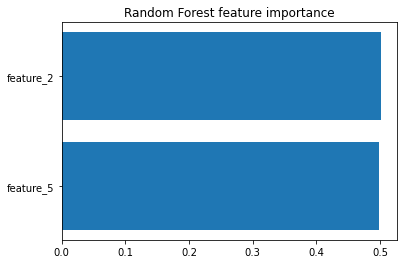

feature_2 had a Feature Importance score of 0.5008757656715797
feature_5 had a Feature Importance score of 0.4991242343284204


In [22]:
# Plotting the feature importance for Random Forest Classifier
def plot_feature_importance(dataframe, model):
    fig, ax = plt.subplots()
    
    # Plot the columns with their feature importance scores from the model
    ax.barh(np.arange(len(dataframe.columns)), model.feature_importances_)
    
    # Format the y axis labels
    ax.set_yticks(np.arange(len(dataframe.columns)))
    ax.set_yticklabels(dataframe.columns)
    
    # Invert the y axxis so that the features are in numerical order from top to bottom.
    ax.invert_yaxis()
    
    ax.set_title("Random Forest feature importance")
    plt.show()
    
    # Print out the scores for easier viewing
    for i in range(len(dataframe.columns)):
        print(f"{dataframe.columns[i]} had a Feature Importance score of {model.feature_importances_[i]}")
        
# Call the above defined function.
plot_feature_importance(X_train_2d, forest_clf)

In this case, both features are pretty much equal in their importance to the model. From our previous scatter plots we could see that the pink dots generally had lower values for both features, whereas the yellow ones had higher values for both features, and so it's unsurprising that both features were found to be valuable for the model. Later on, when we add more features, we'll be able to gain more insight from a feature importance plot such as this.

## Hyperparameters

Random Forests have a wide range of possible hyperparameters available, some of which will change the measurements used to build the forest. For example, the user can change the measure at each node from the default gini impurity and instead use entropy to decide how to split the observations. Here I will introduce five of the main hyperparameters that we can tune for our model which are consistent for all random forests[[40]](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)[[41]](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74). 

### n_estimators - Default = 100

n_estimators determine how many trees will be in the forest. More trees will lead to a more general model, as any tree that is overfit will have its results smoothed out by the rest of the group, and thus one would expect a more accurate model. However this comes at the cost of additional model complexity, and more trees will result in a slower model as each tree needs to be trained. This trade off for higher accuracy and generalisation versus longer training means that random forests are less effective for real-time classification tasks than other models.

### max_features - Default = 'auto'

max_features allows the user to specify how many features can be considered at each node. In my example above, I mentioned that the model might randomly pick 3 out the 10 features at each node. In that scenario, if I wanted to up that to 4, I could just change the max_features hyper parameter to 4. Since the number of features can vary dramatically, the default value for this hyperparameter is "auto" which uses the square root of the number of features, and thus scales as more features are included. It's also possible to use all features at each node (much like a decision tree) by setting this value to None, or reduce the scaled number of features even more by using "log2" to get a log base 2 of the total number of features.

### min_sample_leaf - Default = 1

min_sample_leaf allows the user to specify the minimum amount of samples (observations) that must be present on a leaf node. This means that any decision nodes must ensure that each of the resulting leaf nodes has these many observations, otherwise the split will not take place. A higher value will lead to a more general model, as it'll also limit the depth of the trees. This may also lead to underfitting if a node is required to have too many leaves before it can split, as there may be scenarios where an ideal split is prevented from occurring.

### min_samples_split - Default = 2

Whereas min_sample_leaf determines the minimum number of samples (observations) that must fall either side of a decision node, min_samples_split determines the minimum number of observations that must be at that point for a split to occur. If there aren't enough observations for them to be split (i.e. it's less than the minimum value set for this hyperparameter), then the node will be a leaf instead, and the prediction made, as they cannot be split any further.

### max_depth - Default = None

Deeper trees are more prone to overfitting, as each observation goes through more and more decision nodes before landing in a leaf. While the fact that this is an ensemble algorithm reduces the impact of an individually overfit tree, the user can still specify a maximum tree depth for the composite trees. If the user finds their forests are still overfitting, setting a max depth can help to make a more general model with shallower trees.

I will now use GridSearchCV to try out a few variations of n_estimators, max_depth, min_samples_split and min_samples_leaf. As before, I will keep random_state as 0 so that my results here can be reproduced.

In [23]:
# Declarign the parameters to be used for the GridSearchCV.
forest_parameters = {'n_estimators': [10, 50, 100, 200],
                    'max_depth': [None, 5, 10],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [2, 5, 10],
                    'random_state': [0]}


# Instantiating the grid with the above parameters and a Random Forest model.
forest_grid = GridSearchCV(RandomForestClassifier(), forest_parameters) 
   
# Fitting the model for the grid search
forest_grid.fit(X_train_2d,  y_train.values.ravel()) 
 
# Print the best parameters based on the fit above.
print("The combination of parameters with the best results is: ")
print(forest_grid.best_params_) 

# Generate predictions from those best parameters
forest_grid_predictions = forest_grid.predict(X_test_2d) 
   
# print the accuracy score and confusion matrix
print(f"\nThe model with the above parameters had a classification accuracy of {(accuracy_score(y_test, forest_grid_predictions)*100)}%")
      
print(f"\nThe default model's classification accuracy was {(forest_accuracy*100):.1f}%")

print("\nThe Confusion Matrix for this model is:\n", confusion_matrix(y_test, forest_grid_predictions))

print("\nThe default model's Confusion Matrix was:\n", forest_matrix)


The combination of parameters with the best results is: 
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 0}

The model with the above parameters had a classification accuracy of 85.6%

The default model's classification accuracy was 85.6%

The Confusion Matrix for this model is:
 [[57  7]
 [11 50]]

The default model's Confusion Matrix was:
 [[57  7]
 [11 50]]


Despite this hyperparameter tuning, the results remaining exactly the same. Interestingly, the forest was able to achieve this same result with just 50 trees (n_estimators) rather than the default 100.

As the accuracy and confusion matrices are both exactly the same, I will not plot the decision boundaries here again.


## All 5 Features

I will now train the model on all five features, and again use GridSearchCV to find the best combination of hyperparameters. 

#### Note - This next cell will take a few minutes to run as it cycles through multiple hyperparameter combinations for all five features. Now's a good time to go make a cup of tea.

In [24]:
# Instantiating the grid with the previously defined parameters and a random forest model.
forest_grid = GridSearchCV(RandomForestClassifier(), forest_parameters) 
   
# Fitting the model for the grid search
forest_grid.fit(X_train,  y_train.values.ravel()) 
 
# Print the best parameters based on the fit above.
print("The combination of parameters with the best results is: ")
print(forest_grid.best_params_) 

# Generate predictions from those best parameters
forest_grid_predictions = forest_grid.predict(X_test) 
   
# print the accuracy score and confusion matrix
print(f"\nThe model with the above parameters had a classification accuracy of {(accuracy_score(y_test, forest_grid_predictions)*100)}%")
      
print(f"\nThe default model's classification accuracy was {(forest_accuracy*100):.1f}%")

print("\nThe Confusion Matrix for this model is:\n", confusion_matrix(y_test, forest_grid_predictions))

print("\nThe default model's Confusion Matrix was:\n", forest_matrix)

The combination of parameters with the best results is: 
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 0}

The model with the above parameters had a classification accuracy of 90.4%

The default model's classification accuracy was 85.6%

The Confusion Matrix for this model is:
 [[59  5]
 [ 7 54]]

The default model's Confusion Matrix was:
 [[57  7]
 [11 50]]


With all five features, this random forest had an improved accuracy of 4% compared to the 2 feature model. Similar to the Support Vector Classifier, we would have to decide if the additional cost is worthwhile for our use case. 

Here we can also see that the max_features worked best when it was set at 3. As this dataset only had 5 features, this isn't particularly surprising as it means each decision node would have access to more than half of the features. 

As before, we can plot the feature importance for this five feature model in order to see how much impact feature_2 and feature_5 had.

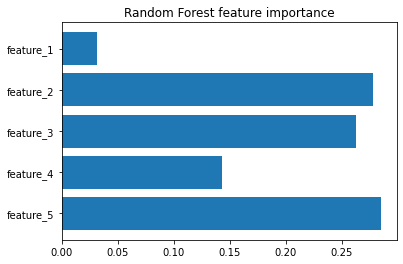

feature_1 had a Feature Importance score of 0.031864930723994336
feature_2 had a Feature Importance score of 0.2779971963094077
feature_3 had a Feature Importance score of 0.2626507748015519
feature_4 had a Feature Importance score of 0.1429177102436257
feature_5 had a Feature Importance score of 0.28456938792142034


In [25]:
# Using the previous function to plot the feature importances.
plot_feature_importance(X_train, forest_grid.best_estimator_)

As expected, feature_2 and feature_5 had the largest influence on the model. We can also see here that feature_1 played a minimal part, and so it may be possible to drop this feature and still retain similar accuracy. Plotting the feature importance like this is a major advantage of using random forests, as they provide fanastic insight that'll aid us in feature selection for our models in real world scenarios.

We've seen how powerful decision trees and random forests can be, although they are more computationally expensive than the Support Vector Classifier. This highlights that there is no one size fits all approach to selecting an appropriate machine learning algorithm. Next up, we'll look at an algorithm that works with unlabeled data - KMeans Clustering.
____

# Algorithm 3) KMeans Clustering

## What is clustering?

As the name suggests, KMeans Clustering clusters observations together based on relationships within the features. Unlike our previous two algorithms, which were trained on historical data where we knew the actual labels (supervised learning), clustering algorithms are used when we do not have such labeled data. In these scenarios, the user may not know if there are actually different classes within their dataset, or if they do know that there's likely to be a few different classes they don't know quite how they look in the data. As there's no labeled data for this algorithm to train on, it's therefore one of the unsupervised learning algorithms available in Scikit-Learn.

Clustering can bring attention to clusters that are present in the data, however in situations where folks want to label the clusters, human users would then have to go through and investigate further to see why they are linked. For example clustering may suggest you have a few distinct groups of customers, but won't tell you why it linked those groups together. Upon looking into it further, an analyst may decipher that one of these groups are women living in Ireland between the ages of 30 and 45 that predominantly land on the storefront via social media posts displaying new products. KMeans cannot be that specific, but with the guidance it provides, a human analyst could work this out. 

With these clusters in place, other products, campaigns and such can be better targeted to specific groups of customers, and even help you determine which customers generate the most revenue for the business[[42]](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/). Clustering therefore goes hand in hand with, and is often the precursor to, segmentation. This allows businesses to split their customer base (or whatever it is their observations are based on) into smaller more manageable groups where it is easier to understand the needs of those smaller groups, rather than attempting a one-size-fits-all approach to the entire customer base. Another common example of clustering is in the recommendation systems that we frequently encounter in modern life, as algorithms can see that users similar to us went on to purchase, watch, or listen to, a particular product next. 

## How are clusters created?

In the case of KMeans, the algorithm will use a measurement known as "inertia" to create its clusters. Inertia measures the distance of each observation compared to a "centroid" with the goal of ensuring that all clusters have the lowest inertia possible, while also having similar variance. As lower inertia means tighter clusters, users can typically be more confident of the findings if their clusters result in low inertia. When creating the model, the user specifies the number of clusters they want, which also determines the number of centroids that should be present, and this represents the "K" in "KMeans".

The centroid itself starts as an arbitrary point on the axes which the algorithm selects and begins measuring from. All observations are assigned to their nearest centroid, and the inertia for that cluster is then measured. The centroid is then moved so as to be in the middle of the cluster, observations are assigned to clusters again, and the inertia measurement is compared to previous ones. The movement of the centroid can mean that new observations are now assigned to its cluster, and so this may make new centroid locations have higher or lower inertia, and will also mean that when the centroid moves to the middle of the cluster again, its location has changed. The algorithm will continue this cycle of moving the centroid, assigning observations to the cluster and measuring inertia until the centroids no longer move, or until a specific number of iterations have passed (this can be specified by the user via the hyperparameters)[[43]](https://scikit-learn.org/stable/modules/clustering.html#k-means).

<img src="https://github.com/OtherBrian/machine-learning/blob/main/images/kmeans.png?raw=true" alt="example of kmeans clustering algorithm" style="width: 600px;"/>

### KMeans Vs KMeans++

While KMeans selects the initial centroid locations randomly, a more efficient method was introduced by David Arthur and  Sergei Vassilvitskii in 2006[[44]](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf). This new method is known as KMeans++ and has been adopted as the default version used in Scikit-Learn, although users can still specify the prior "random" model instead.

By selecting initially random locations for all of the centroids, the prior KMeans algorithm could occasionally end up with sub-optimal clusters. This can occur if the initial centroids happen to be in poor locations, and thus the optimization steps of the algorithm struggle to dramatically improve their locations. This ends up with clusters that may be of little use to the user.

KMeans++ remedies this by selecting just one centroid at random, and having the remaining centroid locations determined by the location of that initial random centroid. Once that initial centroid has its location randomly selected, all of the observations can be measured against that centroid. The algorithm can then probabilistically determine where an ideal starting location for the next centroid would be. If there are two be more than two centroids, then the algorithm can use the inertia from the existing centroids to determine where an ideal starting location for the next centroid would be. From here, the algorithm follows the same rules whereby it'll keep adjusting the centroid based on the inertia and any new observations added to its cluster.

This technique has two major advantages. The first being that the likelihood of all of the centroids initially being placed together or in totally unsuitable locations is prevented, and so the probability of poor final clusters is reduced. The second is that by selecting ideal locations for the subsequent centroids, the algorithm is likely to converge on its ideal clusters much faster as there's already been some analysis to decide those locations, rather than a blind random guess. 


## KMeans Clustering Implementation

In order to compare KMeans to the previous algorithms, I'll first create a model with 2 clusters so that we can see how these groupings differ from the actual labels in the dataset.

In [26]:
# Importing KMeans from Scikit-Learn
from sklearn.cluster import KMeans

# Instantiating a KMeans model with 2 clusters.
# Declaring a random_state for reproducibility.
kmeans = KMeans(n_clusters = 2, random_state = 0)

# Fitting the model to our training data
kmeans.fit(X_train_2d);

# Generating predictions for new observations.
kmeans_predictions = kmeans.predict(X_test_2d)

We can now see where the two centroids are placed, by overlaying them on a scatter plot, as shown below.

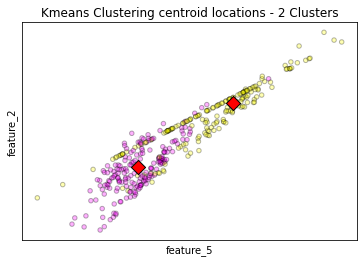

In [27]:
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(X_train['feature_2'], 
            X_train['feature_5'], 
            cmap=plt.cm.spring, 
            c=y_train.values.ravel(), 
            s=20, 
            edgecolors='k', 
            alpha=0.3)

# Assign the cluster centers: centroids
centroids = kmeans.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, 
            centroids_y, 
            marker = 'D', 
            s=100, 
            edgecolors='k', 
            color = 'red')

plt.ylabel('feature_2')
plt.xlabel('feature_5')

# Clearing the ticks.
plt.xticks(())
plt.yticks(())

# title for the plot
plt.title("Kmeans Clustering centroid locations - 2 Clusters")

plt.show()

In [28]:
print(f"\nThe Accuracy Score for this model is: { accuracy_score(y_test, kmeans_predictions) * 100.0:.1f}%")

print("\nThe Confusion Matrix for this model is:\n", confusion_matrix(y_test, kmeans_predictions))


The Accuracy Score for this model is: 80.8%

The Confusion Matrix for this model is:
 [[59  5]
 [19 42]]


Here we can see that the two centroids do fit into the most concentrated sections of our two classes pretty well and it's more than 80% accurate. However the dispersion of the yellow points will likely lead to incorrect predictions as shown by the confusion matrix. In a real world scenario where KMeans would usually be used on unlabeled data, we perhaps wouldn't realise this, and would instead investigate these two groupings more closely before making any judgements as to the model's accuracy. Due to this lack of labels, KMeans wouldn't usually be used with a training and testing dataset like this, but would be used on all available observations and be the launching pad for further investigation or feeding into other algorithms.

Also, we might not know exactly how many clusters we expect to see in a real world situation. In this case, I created the dataset so as to have two distinct clusters, but we could ask the KMeans algorithm to find even more. In situations where we have no intuition as to how many clusters there should be, we can create models with differing amounts of clusters and compare the results. We can then chart the differences in the inertia of each model to give us some insight as to which number of clusters is the most ideal. We're aiming for as few clusters as possible, and with the lowest overall inertia. This is because too many clusters are of limited value for us, whereas a small number of distinct clusters can have major applications depending on the data at hand. For example in clustering the different types of user accounts in an app where product designers and marketers would be looking for a handful of customer personas at the most.

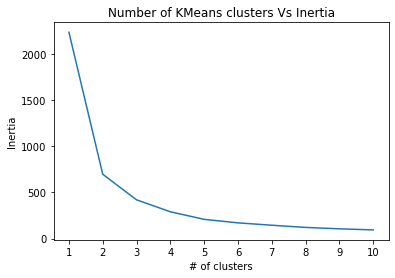

In [29]:
# Storing the inertia from each model.
inertias = []

# Iterate through models with clusers between 1 and 10.
for k in range(1,11):
    # Create a KMeans model with k clusters.
    kmeans_n = KMeans(n_clusters = k, random_state = 0)
    
    # Fit and predict the classes
    kmeans_n.fit_predict(X[['feature_2','feature_5']])
    
    # Save the inertia into the inertias list
    inertias.append(kmeans_n.inertia_)

    
# Plotting the inertias on a line plot.
fig, ax = plt.subplots()
ax.plot(range(1,11), inertias)

# Formatting the labels and ticks
ax.set_xticks(range(1,11))
ax.set_xlabel('# of clusters')
ax.set_ylabel('Inertia')

# Adding a title to the plot.
ax.set_title('Number of KMeans clusters Vs Inertia');

The line chart above is known as an "elbow chart" and can help us make a decision on how many clusters we should use for our KMeans model. The aim is for as few clusters as possible, while balancing for a low inertia, and so we look for the "elbow" in the chart to show us where the diminishing returns of additional clusters kicks in[[45]](https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f). In this case we can see that 2 or 3 clusters would be the ideal number. This isn't surprising as we know there are 2 classes in the dataset. 

Let's see how the 3 clusters would look with our full dataset.

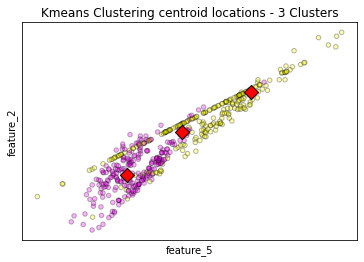

In [30]:
# Creating and fitting a KMeans model with 3 clusters.
kmeans_3 = KMeans(n_clusters = 3, random_state = 0)
kmeans_3.fit_predict(X[['feature_2','feature_5']])

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(X['feature_2'], 
            X['feature_5'], 
            cmap=plt.cm.spring, 
            c=y_plotting, 
            s=20, 
            edgecolors='k', 
            alpha=0.3)

# Assign the cluster centers: centroids
centroids = kmeans_3.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, 
            centroids_y, 
            marker = 'D', 
            s=100, 
            edgecolors='k', 
            color = 'red')

# Labeling the axis
plt.ylabel('feature_2')
plt.xlabel('feature_5')

# Clearing the ticks.
plt.xticks(())
plt.yticks(())

# title for the plot
plt.title("Kmeans Clustering centroid locations - 3 Clusters")

plt.show()

Interestingly, the 3 cluster KMeans model suggests there's a 3rd cluster in between the two classes. If we replot the observations based on the model's predictions and a new colour map, we can see these groupings more clearly.

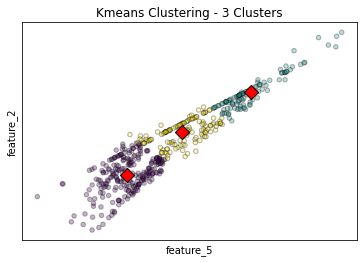

In [31]:
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(X['feature_2'], 
            X['feature_5'], 
            c=kmeans_3.predict(X[['feature_2','feature_5']]), 
            s=20, 
            edgecolors='k', 
            alpha=0.3)

# Assign the cluster centers: centroids
centroids = kmeans_3.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, 
            centroids_y, 
            marker = 'D', 
            s=100, 
            edgecolors='k', 
            color = 'red')

# Label the axes
plt.ylabel('feature_2')
plt.xlabel('feature_5')

# Clearing the ticks.
plt.xticks(())
plt.yticks(())

# title for the plot
plt.title("Kmeans Clustering - 3 Clusters")

plt.show()

From here we can see that 3 clusters could make sense for this dataset. In a real world scenario the user would have to explore further and decide whether 2 clusters or 3 clusters is more intuitive for their use case.

This example really highlights the strengths and trade-offs of unsupervised learning algorithms. They can help us find completely new insights into our data. Those insights may not always be valuable for our needs though, as we're not providing any of the guard rails that would help guide the algorithm, such as the labeled data used to train supervised learning algorithms. Meanwhile, whereas algorithms like the Random Forest provide us with context regarding how important each feature was in its prediction, KMeans does cannot do this[[46]](https://holypython.com/k-means/k-means-pros-cons/). In situations where we need to know why groups were clustered in such a way, such as when we're defining customer segments, this lack of context around feature importance can be a further hindrance to us taking full advantage of the algorithm's predictions.

Additionally, the efficiency of the algorithm does lend itself to being an inexpensive tool in the data scientists toolbelt, and can provide the initial insight that leads to more detailed results through the data scientist's further exploration and testing.
____

# Conclusion

Through this notebook I have introduced the Python library Scikit-Learn, as well as three of its popular machine learning algorithms; Support Vector Classifiers, Random Forest Classifiers (via Decision Tree Classifiers) and KMeans Clustering. I touched on the theory behind these algorithms, their strengths and weaknesses, and when one might opt to use them as their model of choice.

I also introduced a number of features available from Scikit-Learn that help us to prepare our data for use with these machine learning algorithms, and for assessing their effectiveness. Through tools such as train_test_split and GridSearchCV, we can optimize our machine learning models and aim towards the most parsimonious model possible. Meanwhile the sklearn.metrics sub-library has a multitude of performance metrics that can be used for a wide range of machine learning tasks.

We have seen how easy all of this was to implement via Scikit-Learn. Just a few short lines of code can prepare the dataset, train the algorithm, make predictions and measure the quality of those predictions. It's therefore crucial that we take the time to understand the algorithms and tools we are using, so as to ensure that we are using them in the expected manner in the ideal situations. Scikit-Learn, and libraries like it, have taken massive steps to democratize the power of machine learning, but it is still our responsibility to ensure we are using that power appropriately.

This notebook has barely scratched the surface on Scikit-Learn's features, functionality and algorithms. I strongly encourage readers to explore and experiment. There's much to be learned and much fun to be had!
____

# Resources
[1] Sarah Brown. "Machine learning, explained". 2021. [Online]. From MIT Management Sloan School. Available: https://mitsloan.mit.edu/ideas-made-to-matter/machine-learning-explained<br>
[2] Larry Hardesty. "The history of Amazon's recommendation algorithm". 2019. [Online]. From Amazon Science. Available: https://www.amazon.science/the-history-of-amazons-recommendation-algorithm<br>
[3] Paige Cooper. "How the Facebook Algorithm Works in 2021 and How to Make it Work for You". 2021. [Online]. From Hootsuite.com. Available: https://blog.hootsuite.com/facebook-algorithm/<br>
[4] Daniel Ku. "How Does The LinkedIn Algorithm Work in 2021?". 2021. [Online]. From PostBeyond by Intuitive. Available: https://www.postbeyond.com/blog/how-linkedin-algorithm-works/<br>
[5] Redwan Uz Zaman Reham. "How machine learning is changing your smartphone camera". 2020. [Online]. From AI Daily. Available: https://aidaily.co.uk/articles/how-machine-learning-is-changing-your-smartphone-camera-1<br>
[6] Joydeep Bhattacharjee. "Some Key Machine Learning Definitions". 2017. [Online]. From NineLeaps. Available: https://medium.com/technology-nineleaps/some-key-machine-learning-definitions-b524eb6cb48<br>
[7] "House Prices - Advanced Regression Techniques". [Online]. From Kaggle. Available: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview<br>
[8] Patrick Clark. "Zillow’s Algorithm-Fueled Buying Spree Doomed Its Home-Flipping Experiment". 2021. [Online]. From Bloomberg Businessweek. Available: https://www.bloomberg.com/news/articles/2021-11-08/zillow-z-home-flipping-experiment-doomed-by-tech-algorithms<br>
[9] Julianna Delua. "Supervised vs. Unsupervised Learning: What’s the Difference?". 2021. [Online]. From IBM Cloud. Available: https://www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning<br>
[10] Abhinav Sagar. "Customer Segmentation Using K Means Clustering". 2019. [Online]. From Towards Data Science. Available: https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3<br>
[11] "sklearn.model_selection.GridSearchCV — scikit-learn 1.0.2 documentation". 2021. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV<br>
[12] "Frequently Asked Questions — scikit-learn 1.0.2 documentation". 2021. [Online]. Available: https://scikit-learn.org/stable/faq.html#why-does-scikit-learn-not-directly-work-with-for-example-pandas-dataframe<br>
[13] "6. Dataset transformations — scikit-learn 1.0.2 documentation". 2021. [Online]. Available: https://scikit-learn.org/stable/data_transforms.html<br>
[14] "3. Model selection and evaluation — scikit-learn 1.0.2 documentation". 2021. [Online]. Available: https://scikit-learn.org/stable/model_selection.html<br>
[15] "sklearn.datasets.make_classification — scikit-learn 0.16.1 documentation". 2021. [Online]. Available: https://scikit-learn.org/0.16/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification<br>
[16] "seaborn.pairplot — seaborn 0.11.2 documentation". 2021. [Online]. Available: https://seaborn.pydata.org/generated/seaborn.pairplot.html<br>
[17] David Carty. "Training Data vs. Validation Data vs. Test Data for ML Algorithms". 2021. [Online]. From Applause. Available: https://www.applause.com/blog/training-data-validation-data-vs-test-data<br>
[18] "sklearn.model_selection.train_test_split — scikit-learn 1.0.2 documentation". 2021. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html<br>
[19] Saptashwa Bhattacharyya. "Support Vector Machine: Complete Theory". 2018. [Online]. From Towards Data Science. Available: https://towardsdatascience.com/understanding-support-vector-machine-part-1-lagrange-multipliers-5c24a52ffc5e<br>
[20] "1.4. Support Vector Machines — scikit-learn 1.0.2 documentation". 2021. [Online]. Available: https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use<br>
[21] "6.3. Preprocessing data — scikit-learn 1.0.2 documentation". 2021. [Online]. Available: https://scikit-learn.org/stable/modules/preprocessing.html<br>
[22] Ajitesh Kumar. "Machine Learning – SVM Kernel Trick Example". 2020. [Online]. From Vitaflux. Available: https://vitalflux.com/machine-learning-svm-kernel-trick-example/<br>
[23] Rushikesh Pupale. "Support Vector Machines(SVM) — An Overview". 2018. [Online]. From Towards Data Science. Available: https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989<br>
[24] "RBF SVM parameters — scikit-learn 1.0.2 documentation". 2021. [Online]. Available: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html<br>
[25] Soner Yıldırım. "Hyperparameter Tuning for Support Vector Machines — C and Gamma Parameters". 2020. [Online]. From Towards Data Science. Available: https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167<br>
[26] Corinna Cortes, Vladimir Vapnik. "Support-Vector Networks". 1995. [Online]. From Machine Learning, 20, 273-297 (1995). Available: http://image.diku.dk/imagecanon/material/cortes_vapnik95.pdf<br>
[27] "RBF SVM parameters — scikit-learn 1.0.2 documentation". 2021. [Online]. Available: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html<br>
[28] "sklearn.metrics.accuracy_score — scikit-learn 1.0.2 documentation". 2021. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score<br>
[29] "Simple guide to confusion matrix terminology". 2014. [Online]. From Data School. Available: https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/<br>
[30] "sklearn.metrics.confusion_matrix — scikit-learn 1.0.2 documentation". 2021. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br>
[31] Serafeim Loukas. "Plot scikit-learn (sklearn) SVM decision boundary / surface | Newbedev". 2020. [Online]. For Newbedev. Available: https://towardsdatascience.com/support-vector-machines-svm-clearly-explained-a-python-tutorial-for-classification-problems-29c539f3ad8<br>
[32] "1.11. Ensemble methods — scikit-learn 1.0.2 documentation". 2021. [Online]. Available: https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees<br>
[33] "The Wisdom of Crowds". [Online]. From Wikipedia. Available: https://en.wikipedia.org/wiki/The_Wisdom_of_Crowds<br>
[34] Victor Zhou. "A Simple Explanation of Gini Impurity". 2019. [Online]. From Victor Zhou. Available: https://victorzhou.com/blog/gini-impurity/<br>
[35] "sklearn.tree.DecisionTreeClassifier — scikit-learn 1.0.2 documentation". 2021. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br>
[36] "sklearn.tree.plot_tree — scikit-learn 1.0.2 documentation". 2021. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html<br>
[37] "1.11. Ensemble methods — scikit-learn 1.0.2 documentation". 2021. [Online]. Available: https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator<br>
[38] Niklas Donges. "A Complete Guide to the Random Forest Algorithm". 2021. [Online]. From Builtin Beta. Available: https://builtin.com/data-science/random-forest-algorithm<br>
[39] "sklearn.ensemble.RandomForestClassifier — scikit-learn 1.0.2 documentation". 2021. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
[40] Tony Yiu. "Understanding Random Forest". 2019. [Online]. From Towards Data Science. Available: https://towardsdatascience.com/understanding-random-forest-58381e0602d2<br>
[41] Will Koehrsen. "Hyperparameter Tuning the Random Forest in Python". 2018. [Online]. From Towards Data Science. Available: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74<br>
[42] Pulkit Sharma. "The Most Comprehensive Guide to K-Means Clustering You’ll Ever Need". 2019. [Online]. From Analytics Vidyha. Available: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/<br>
[43] "2.3. Clustering — scikit-learn 1.0.2 documentation". 2021. [Online]. Available: https://scikit-learn.org/stable/modules/clustering.html#k-means<br>
[44] David Arthur, Sergei Vassilvitskii. "k-means++: The Advantages of Careful Seeding". 2006. [Online]. Available: http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf<br>
[45] Tola Alade. "Tutorial: How to determine the optimal number of clusters for k-means clustering". 2018. [Online]. From Cambridge Spark. Available: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f<br>
[46] "K-Means Pros & Cons - HolyPython.com". [Online]. From Holy Python. Available: https://holypython.com/k-means/k-means-pros-cons/<br>
